In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# %load neuralnet_backprop.py
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    y = exp_a / np.sum(exp_a)
    return y

def softmax_batch(A):
    return np.apply_along_axis(arr=A, axis=1, func1d=softmax)

def cross_entroy_error(y_pred, y):
    """분류용 손실함수"""
    delta = 1e-7 # 아주 작은 값.     
    return -np.sum(y * np.log(y_pred + delta))

def cross_entropy_error_batch(y_pred, y):
    batch_size = len(y)
    cse = cross_entroy_error(y_pred, y) / batch_size
    return cse


class ReLu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = x > 0
        return np.where(self.mask, x, 0)
    
    def backward(self, dout):
        return np.where(self.mask, 1, 0)


class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        self.out = 1 / (1 + np.exp(-x))
        return self.out
    
    def backward(self, dout):
        dx = dout * self.out * (1 - self.out)
        return dx


class Affine:
    def __init__(self, 입력수, 출력수):
        self.W = np.random.randn(입력수, 출력수)
        self.b = np.random.randn(출력수)
        self.X = None
        self.dW = None
        self.db = None
        
    def forward(self, X):
        self.X = X
        z = np.dot(X, self.W) + self.b
        return z
    
    def backward(self, dout):
        dX = np.dot(dout, self.W.T)
        self.dW = np.dot(self.X.T, dout)
        self.db = np.sum(dout, axis=0)
        return dX


class SoftmaxCrossEntropy:
    def __init__(self):
        self.Y = None
        self.Y_pred = None
        
    def forward(self, X, Y):
        self.Y = Y
        self.Y_pred = softmax_batch(X)
        loss = cross_entropy_error_batch(self.Y_pred, self.Y)
        return loss
    
    def backward(self, dout=1):
        batch_size = len(self.Y)
        dX = (self.Y_pred - self.Y) / batch_size
        return dX


class FeedForwadNet:
    def __init__(self):
        self.layers = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def predict(self, X):
        layer_output = X
        for layer in self.layers[:-1]:
            layer_output = layer.forward(layer_output)            
        return layer_output
    
    def compute_loss(self, X, Y):
        Y_pred = self.predict(X)
        loss = self.layers[-1].forward(Y_pred, Y)
        return loss
    
    def fit(self, X, y, 배치크기, 학습횟수, 학습률):
        loss_history = []
        for i in range(학습횟수):
            # 1. 미니배치
            샘플수 = len(X)
            배치색인 = np.random.choice(샘플수, 배치크기)
            X_batch = X[배치색인]
            y_batch = y[배치색인]
            # 2. 기울기 산출
            #  1) 순전파
            self.compute_loss(X_batch, y_batch)
            #  2) 역전파
            dout = 1
            for layer in reversed(self.layers):
                dout = layer.backward(dout)
            # 3. 갱신
            for layer in self.layers:
                if isinstance(layer, Affine):
                    layer.W -= layer.dW * 학습률
                    layer.b -= layer.db * 학습률
            
            # 손실 확인
            loss = self.compute_loss(X_batch, y_batch)
            loss_history.append(loss)
            print('[학습 {}] Loss: {}'.format(i+1, loss))
        
        return loss_history

In [3]:
from deepy.dataset import mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = \
    mnist.load_mnist(flatten=True, normalize=True, 
                     one_hot_label=True)

In [5]:
model = FeedForwadNet()
model.add(Affine(784, 50))
model.add(Sigmoid())
model.add(Affine(50, 100))
model.add(Sigmoid())
model.add(Affine(100, 10))
model.add(SoftmaxCrossEntropy())

In [6]:
loss_history = model.fit(X_train, Y_train, 
                         배치크기=100, 학습횟수=600*10, 
                         학습률=0.01)

[학습 1] Loss: 8.93967892218332
[학습 2] Loss: 8.062336367014781
[학습 3] Loss: 7.9988240375876645
[학습 4] Loss: 8.6454949809334
[학습 5] Loss: 8.57931014421597
[학습 6] Loss: 7.3758463471805165
[학습 7] Loss: 7.722333830752479
[학습 8] Loss: 7.336855513805043
[학습 9] Loss: 7.065492193121757
[학습 10] Loss: 7.130135419504221
[학습 11] Loss: 7.304528921220433
[학습 12] Loss: 7.662084082913939
[학습 13] Loss: 6.918989399166103
[학습 14] Loss: 7.241664039160862
[학습 15] Loss: 6.189207182181124
[학습 16] Loss: 6.837744678277124
[학습 17] Loss: 6.690520195288761
[학습 18] Loss: 7.230702124116804
[학습 19] Loss: 6.40903569937042
[학습 20] Loss: 5.653010205594318
[학습 21] Loss: 6.650888280122673
[학습 22] Loss: 6.082553677047263
[학습 23] Loss: 6.786671353559749
[학습 24] Loss: 5.528023587070095
[학습 25] Loss: 5.900581770227576
[학습 26] Loss: 6.1835577985110834
[학습 27] Loss: 5.475764051827504
[학습 28] Loss: 5.8242657403750995
[학습 29] Loss: 6.142503668388083
[학습 30] Loss: 5.829987573641577
[학습 31] Loss: 5.230769616148208
[학습 32] Loss: 4.67

[학습 264] Loss: 3.0503480161826344
[학습 265] Loss: 2.892338430273611
[학습 266] Loss: 3.1443374439951275
[학습 267] Loss: 3.3201791636019844
[학습 268] Loss: 3.0226396253763532
[학습 269] Loss: 3.2032056091348444
[학습 270] Loss: 3.139152521679955
[학습 271] Loss: 2.627839704915516
[학습 272] Loss: 3.179343147443102
[학습 273] Loss: 3.38445035369209
[학습 274] Loss: 2.9590656638057147
[학습 275] Loss: 3.2245975594336485
[학습 276] Loss: 2.7422075325232047
[학습 277] Loss: 2.988663675211684
[학습 278] Loss: 3.0888961991918085
[학습 279] Loss: 2.8072940972536413
[학습 280] Loss: 2.677131333716693
[학습 281] Loss: 2.9166262118951547
[학습 282] Loss: 3.1053273780213875
[학습 283] Loss: 2.9405295618341274
[학습 284] Loss: 3.346669027826987
[학습 285] Loss: 2.9562228148228384
[학습 286] Loss: 3.080113184405953
[학습 287] Loss: 2.8601832064942014
[학습 288] Loss: 3.1657965327068123
[학습 289] Loss: 3.4126381946561146
[학습 290] Loss: 2.8502942883761735
[학습 291] Loss: 2.7794145685132747
[학습 292] Loss: 2.8579148866949593
[학습 293] Loss: 3.1930678

[학습 510] Loss: 2.280821627216152
[학습 511] Loss: 2.386453460396552
[학습 512] Loss: 2.4823253957231755
[학습 513] Loss: 2.859268286740911
[학습 514] Loss: 2.472643283426486
[학습 515] Loss: 2.4188446651515427
[학습 516] Loss: 2.6112955396473994
[학습 517] Loss: 2.3962814868765947
[학습 518] Loss: 2.8666887643711125
[학습 519] Loss: 2.195284618138133
[학습 520] Loss: 2.5663682619842603
[학습 521] Loss: 2.2701705900038878
[학습 522] Loss: 2.712929309964987
[학습 523] Loss: 2.623892844321988
[학습 524] Loss: 2.4694509550669
[학습 525] Loss: 2.3830541189492873
[학습 526] Loss: 2.4362448301525403
[학습 527] Loss: 2.3094142885369426
[학습 528] Loss: 2.4521084183565334
[학습 529] Loss: 2.305126339536437
[학습 530] Loss: 2.227973176026792
[학습 531] Loss: 2.3672350728066855
[학습 532] Loss: 2.5246727601476597
[학습 533] Loss: 2.3529621035845065
[학습 534] Loss: 2.367279364962857
[학습 535] Loss: 2.6281729016744224
[학습 536] Loss: 2.733421284630824
[학습 537] Loss: 2.2753390936880713
[학습 538] Loss: 2.794099209990855
[학습 539] Loss: 2.237525323335

[학습 755] Loss: 1.9489236270302228
[학습 756] Loss: 2.130053379474493
[학습 757] Loss: 2.223306460529921
[학습 758] Loss: 2.349014691980453
[학습 759] Loss: 2.3436295672172425
[학습 760] Loss: 2.275422915871169
[학습 761] Loss: 2.0274536542001247
[학습 762] Loss: 2.152921738885262
[학습 763] Loss: 1.9794923403778273
[학습 764] Loss: 1.919385109621362
[학습 765] Loss: 2.252507896581887
[학습 766] Loss: 1.7995491721728711
[학습 767] Loss: 1.985844937383363
[학습 768] Loss: 1.9078811732567686
[학습 769] Loss: 1.963247835260387
[학습 770] Loss: 1.9402660564774559
[학습 771] Loss: 2.1927578331994226
[학습 772] Loss: 1.7922679964709385
[학습 773] Loss: 2.3607896183432526
[학습 774] Loss: 2.2123103865416
[학습 775] Loss: 2.2154094757973115
[학습 776] Loss: 1.7943956796298772
[학습 777] Loss: 2.247648308745548
[학습 778] Loss: 1.9028420707767857
[학습 779] Loss: 2.0797363945874996
[학습 780] Loss: 2.164199110333544
[학습 781] Loss: 1.9055869909794638
[학습 782] Loss: 2.3334734903705616
[학습 783] Loss: 2.27546520252341
[학습 784] Loss: 1.9539530831298

[학습 1002] Loss: 1.862782177473012
[학습 1003] Loss: 2.0853102692826595
[학습 1004] Loss: 1.7269615676344128
[학습 1005] Loss: 1.6829585702868706
[학습 1006] Loss: 1.8904594580577743
[학습 1007] Loss: 1.9361488690757187
[학습 1008] Loss: 1.8474542749372151
[학습 1009] Loss: 1.8184090382654592
[학습 1010] Loss: 2.050117422394897
[학습 1011] Loss: 1.864442821886696
[학습 1012] Loss: 1.9040851883971197
[학습 1013] Loss: 1.7821766184870387
[학습 1014] Loss: 1.8314908768698688
[학습 1015] Loss: 2.1033732379215717
[학습 1016] Loss: 1.9353485943135658
[학습 1017] Loss: 1.783307088840823
[학습 1018] Loss: 1.956491078155892
[학습 1019] Loss: 1.5664919060346154
[학습 1020] Loss: 2.0062343349848275
[학습 1021] Loss: 1.8877199860295446
[학습 1022] Loss: 1.7324097575009154
[학습 1023] Loss: 1.8077165010079765
[학습 1024] Loss: 1.7061128954201719
[학습 1025] Loss: 1.9215922698294077
[학습 1026] Loss: 1.8332302066558677
[학습 1027] Loss: 1.7620049715830495
[학습 1028] Loss: 1.792583815889987
[학습 1029] Loss: 1.8222305847834905
[학습 1030] Loss: 1.71461154

[학습 1243] Loss: 1.6163173964671012
[학습 1244] Loss: 1.7265983465852353
[학습 1245] Loss: 1.792329561571761
[학습 1246] Loss: 1.565896674490218
[학습 1247] Loss: 2.0049681391901744
[학습 1248] Loss: 1.5788528381978073
[학습 1249] Loss: 1.817830182038338
[학습 1250] Loss: 1.4786141419380774
[학습 1251] Loss: 1.6167481161711503
[학습 1252] Loss: 1.4252735197446809
[학습 1253] Loss: 1.5433280451557625
[학습 1254] Loss: 1.605072259428398
[학습 1255] Loss: 1.9566387840335113
[학습 1256] Loss: 1.718172796957013
[학습 1257] Loss: 1.6900342144978844
[학습 1258] Loss: 1.8166663388467452
[학습 1259] Loss: 1.867420699835656
[학습 1260] Loss: 1.6814507114470072
[학습 1261] Loss: 1.7439138622538273
[학습 1262] Loss: 1.6176466791574844
[학습 1263] Loss: 1.8103452085060507
[학습 1264] Loss: 1.6508827442701324
[학습 1265] Loss: 1.5926880591454933
[학습 1266] Loss: 2.07647590285419
[학습 1267] Loss: 1.6443877642238396
[학습 1268] Loss: 1.9014543482234996
[학습 1269] Loss: 1.6512306180452998
[학습 1270] Loss: 1.4945838915269802
[학습 1271] Loss: 1.8847858002

[학습 1491] Loss: 1.659384559889058
[학습 1492] Loss: 1.5763606883736123
[학습 1493] Loss: 1.6864983062781909
[학습 1494] Loss: 1.5293320191679214
[학습 1495] Loss: 1.6926404584088528
[학습 1496] Loss: 1.3982133983832847
[학습 1497] Loss: 1.7012927308616062
[학습 1498] Loss: 1.3558364184095506
[학습 1499] Loss: 1.5371328217539744
[학습 1500] Loss: 1.5453755229212527
[학습 1501] Loss: 1.5376906710886755
[학습 1502] Loss: 1.6866557124733033
[학습 1503] Loss: 1.4585989777933372
[학습 1504] Loss: 1.4970148356856179
[학습 1505] Loss: 1.7520115717624865
[학습 1506] Loss: 1.6676102261283023
[학습 1507] Loss: 1.67966786148127
[학습 1508] Loss: 1.6324411496387217
[학습 1509] Loss: 1.5545985011088914
[학습 1510] Loss: 1.7360848406931697
[학습 1511] Loss: 1.6255943529677839
[학습 1512] Loss: 1.527273871757845
[학습 1513] Loss: 1.8193155928438165
[학습 1514] Loss: 1.7073719568029022
[학습 1515] Loss: 1.4216784462726662
[학습 1516] Loss: 1.4353342002799234
[학습 1517] Loss: 1.4234248246172425
[학습 1518] Loss: 1.6803912689463303
[학습 1519] Loss: 1.470558

[학습 1731] Loss: 1.5473978465922116
[학습 1732] Loss: 1.5182107037867076
[학습 1733] Loss: 1.3845331977342574
[학습 1734] Loss: 1.5044994020272326
[학습 1735] Loss: 1.2494702060483234
[학습 1736] Loss: 1.737949739377095
[학습 1737] Loss: 1.511046726310264
[학습 1738] Loss: 1.466441100700046
[학습 1739] Loss: 1.3761919726938476
[학습 1740] Loss: 1.5738449875743787
[학습 1741] Loss: 1.619063945162764
[학습 1742] Loss: 1.4544222940553277
[학습 1743] Loss: 1.3997835585631913
[학습 1744] Loss: 1.5423359348349184
[학습 1745] Loss: 1.5684372614917805
[학습 1746] Loss: 1.6175881693164171
[학습 1747] Loss: 1.4586633609249737
[학습 1748] Loss: 1.4016154084853456
[학습 1749] Loss: 1.2713830979006142
[학습 1750] Loss: 1.5085933875981732
[학습 1751] Loss: 1.4904394786108381
[학습 1752] Loss: 1.3485514181591294
[학습 1753] Loss: 1.3906532452981966
[학습 1754] Loss: 1.2872745842070004
[학습 1755] Loss: 1.6855068846989416
[학습 1756] Loss: 1.1272691390932343
[학습 1757] Loss: 1.3704367059734222
[학습 1758] Loss: 1.3505406089495084
[학습 1759] Loss: 1.331082

[학습 1968] Loss: 1.3663257117722174
[학습 1969] Loss: 1.1503453597057345
[학습 1970] Loss: 1.47977812265833
[학습 1971] Loss: 1.5204797519247308
[학습 1972] Loss: 1.3353571495757683
[학습 1973] Loss: 1.4538925435761985
[학습 1974] Loss: 1.2340925922102601
[학습 1975] Loss: 1.307476677794542
[학습 1976] Loss: 1.3533039788424674
[학습 1977] Loss: 1.6080660870261274
[학습 1978] Loss: 1.3510995088083844
[학습 1979] Loss: 1.3589241324544248
[학습 1980] Loss: 1.5736745506541803
[학습 1981] Loss: 1.5576921183583992
[학습 1982] Loss: 1.373558062756427
[학습 1983] Loss: 1.3012512694123324
[학습 1984] Loss: 1.262931497100102
[학습 1985] Loss: 1.3125995422762031
[학습 1986] Loss: 1.3947073440119564
[학습 1987] Loss: 1.4241671677271541
[학습 1988] Loss: 1.4822518094964108
[학습 1989] Loss: 1.2259788499391917
[학습 1990] Loss: 1.3016628242423485
[학습 1991] Loss: 1.2347579485747784
[학습 1992] Loss: 1.489390382533944
[학습 1993] Loss: 1.315785801016931
[학습 1994] Loss: 1.052612248349936
[학습 1995] Loss: 1.3693307533463797
[학습 1996] Loss: 1.5351310153

[학습 2219] Loss: 1.237931996167962
[학습 2220] Loss: 1.2052602544690196
[학습 2221] Loss: 1.2803358420809356
[학습 2222] Loss: 1.3131255979142025
[학습 2223] Loss: 1.6486503141547508
[학습 2224] Loss: 1.3025754032717367
[학습 2225] Loss: 1.3291149486437632
[학습 2226] Loss: 1.3103363055409971
[학습 2227] Loss: 1.5432304516588105
[학습 2228] Loss: 1.2214201717636053
[학습 2229] Loss: 1.5419789134529527
[학습 2230] Loss: 1.193559864753781
[학습 2231] Loss: 1.3727955481313217
[학습 2232] Loss: 1.3849583011091575
[학습 2233] Loss: 1.3249118625979577
[학습 2234] Loss: 1.3797369517982352
[학습 2235] Loss: 1.2019336709265165
[학습 2236] Loss: 1.4321973054959336
[학습 2237] Loss: 1.324113923630992
[학습 2238] Loss: 1.3842475329949246
[학습 2239] Loss: 1.369553822964088
[학습 2240] Loss: 1.3757424756916088
[학습 2241] Loss: 1.181505604245887
[학습 2242] Loss: 1.219878754077235
[학습 2243] Loss: 1.2316293850494748
[학습 2244] Loss: 1.310261290190498
[학습 2245] Loss: 1.2762680640558397
[학습 2246] Loss: 1.459260666892414
[학습 2247] Loss: 1.3365953443

[학습 2460] Loss: 1.2170834790332608
[학습 2461] Loss: 1.2280968808486719
[학습 2462] Loss: 1.3695621635674022
[학습 2463] Loss: 0.969435385367103
[학습 2464] Loss: 1.4125142015308023
[학습 2465] Loss: 1.0116609354209516
[학습 2466] Loss: 1.43395195645812
[학습 2467] Loss: 1.2428832899051638
[학습 2468] Loss: 1.2943798811366196
[학습 2469] Loss: 1.420149562641106
[학습 2470] Loss: 1.3320977281994948
[학습 2471] Loss: 1.255619104703316
[학습 2472] Loss: 1.3229583299751433
[학습 2473] Loss: 1.2314740123522945
[학습 2474] Loss: 1.246287463515528
[학습 2475] Loss: 1.2227558683327562
[학습 2476] Loss: 1.5545988495724095
[학습 2477] Loss: 1.2736418089150168
[학습 2478] Loss: 1.269545640017818
[학습 2479] Loss: 1.2708335920954759
[학습 2480] Loss: 1.1787243378867487
[학습 2481] Loss: 1.3286925836441503
[학습 2482] Loss: 1.1387692913383507
[학습 2483] Loss: 1.2028607720491626
[학습 2484] Loss: 1.3060440200231755
[학습 2485] Loss: 1.300762534659227
[학습 2486] Loss: 1.4985624391553733
[학습 2487] Loss: 1.2632000590465033
[학습 2488] Loss: 1.2930320075

[학습 2700] Loss: 1.0852826407484353
[학습 2701] Loss: 1.152033427185331
[학습 2702] Loss: 1.251333331438189
[학습 2703] Loss: 1.6904857777926847
[학습 2704] Loss: 1.032024230535687
[학습 2705] Loss: 1.1542247094659481
[학습 2706] Loss: 0.9898757595661027
[학습 2707] Loss: 1.3388573416512621
[학습 2708] Loss: 1.3904943956681957
[학습 2709] Loss: 1.0041913152789474
[학습 2710] Loss: 1.101564199683144
[학습 2711] Loss: 1.1193366624908814
[학습 2712] Loss: 1.3777912128920484
[학습 2713] Loss: 1.163447633272522
[학습 2714] Loss: 1.094168239538053
[학습 2715] Loss: 1.1169266197205392
[학습 2716] Loss: 1.2303849482834526
[학습 2717] Loss: 1.179644018078924
[학습 2718] Loss: 1.3729671089409208
[학습 2719] Loss: 1.4269521081209762
[학습 2720] Loss: 1.382744327148817
[학습 2721] Loss: 1.1433560882346854
[학습 2722] Loss: 1.0065070361926765
[학습 2723] Loss: 1.1518775330591564
[학습 2724] Loss: 1.381483283801665
[학습 2725] Loss: 1.012242738660976
[학습 2726] Loss: 1.2592173446744228
[학습 2727] Loss: 1.2254828111118423
[학습 2728] Loss: 1.196397108895

[학습 2937] Loss: 1.2259344042110987
[학습 2938] Loss: 1.1138192746415527
[학습 2939] Loss: 0.9955135636596916
[학습 2940] Loss: 1.1099298440561127
[학습 2941] Loss: 1.0585358181673505
[학습 2942] Loss: 1.4401162430064278
[학습 2943] Loss: 1.3412948697482676
[학습 2944] Loss: 1.103194210266188
[학습 2945] Loss: 1.0255550990236204
[학습 2946] Loss: 1.3909122920679675
[학습 2947] Loss: 1.3706997438736712
[학습 2948] Loss: 1.1820492463827406
[학습 2949] Loss: 1.1776024716226314
[학습 2950] Loss: 1.2062580237701874
[학습 2951] Loss: 1.1477920672755504
[학습 2952] Loss: 1.3178032659576373
[학습 2953] Loss: 1.015893396283898
[학습 2954] Loss: 1.2204268092335238
[학습 2955] Loss: 1.4239719072788768
[학습 2956] Loss: 1.1051312722961597
[학습 2957] Loss: 0.8980629696851057
[학습 2958] Loss: 1.1589947113543144
[학습 2959] Loss: 1.2852414763514768
[학습 2960] Loss: 1.0821589368793472
[학습 2961] Loss: 0.9765669888838211
[학습 2962] Loss: 1.076392183261688
[학습 2963] Loss: 1.0955968097007793
[학습 2964] Loss: 0.8403788621967324
[학습 2965] Loss: 1.23492

[학습 3183] Loss: 1.230949615722288
[학습 3184] Loss: 1.0857519662083375
[학습 3185] Loss: 1.1791494390687034
[학습 3186] Loss: 1.2002080757847475
[학습 3187] Loss: 1.1153934763978202
[학습 3188] Loss: 1.066312532796644
[학습 3189] Loss: 1.2693408387966525
[학습 3190] Loss: 1.0810002948489603
[학습 3191] Loss: 1.1528066658069647
[학습 3192] Loss: 1.2656802181881812
[학습 3193] Loss: 1.198102305712181
[학습 3194] Loss: 0.9042672054885041
[학습 3195] Loss: 0.9738109500873002
[학습 3196] Loss: 1.1018510997357114
[학습 3197] Loss: 1.180046291800656
[학습 3198] Loss: 1.002708787440453
[학습 3199] Loss: 1.177281296201482
[학습 3200] Loss: 0.9988765396605117
[학습 3201] Loss: 1.3096414876749307
[학습 3202] Loss: 1.2134500946425044
[학습 3203] Loss: 1.0900736010392629
[학습 3204] Loss: 1.3290182159344306
[학습 3205] Loss: 1.136645604756592
[학습 3206] Loss: 1.2449758856996043
[학습 3207] Loss: 1.1018878763217155
[학습 3208] Loss: 1.2542910582297524
[학습 3209] Loss: 1.0713440622659698
[학습 3210] Loss: 1.185586936268899
[학습 3211] Loss: 1.0880026386

[학습 3434] Loss: 1.3756348795583062
[학습 3435] Loss: 0.9981533837224527
[학습 3436] Loss: 1.0441317041190539
[학습 3437] Loss: 1.016288496741232
[학습 3438] Loss: 0.9535531169174272
[학습 3439] Loss: 1.1198778279702086
[학습 3440] Loss: 1.307606563345299
[학습 3441] Loss: 1.1501655256394947
[학습 3442] Loss: 1.0638329723693558
[학습 3443] Loss: 1.0476601317088021
[학습 3444] Loss: 1.0505939060242269
[학습 3445] Loss: 1.223978441088006
[학습 3446] Loss: 1.1948891908856927
[학습 3447] Loss: 0.933142794038773
[학습 3448] Loss: 1.2258126807617022
[학습 3449] Loss: 1.0704704362755038
[학습 3450] Loss: 1.0637113911731033
[학습 3451] Loss: 0.9555988567742603
[학습 3452] Loss: 1.0298649205751753
[학습 3453] Loss: 1.1387918392591212
[학습 3454] Loss: 1.1047320798688747
[학습 3455] Loss: 1.1836363689753862
[학습 3456] Loss: 1.0939233275174813
[학습 3457] Loss: 1.1179476662533951
[학습 3458] Loss: 0.9158336024605975
[학습 3459] Loss: 1.0409379309396667
[학습 3460] Loss: 0.9699001583595177
[학습 3461] Loss: 1.0363362571604897
[학습 3462] Loss: 1.199964

[학습 3672] Loss: 1.13126396392751
[학습 3673] Loss: 1.0475901714966471
[학습 3674] Loss: 1.0937518158344406
[학습 3675] Loss: 0.9752358899871615
[학습 3676] Loss: 0.9800898310044187
[학습 3677] Loss: 0.9607523654848539
[학습 3678] Loss: 1.1278716254924044
[학습 3679] Loss: 0.965126156731531
[학습 3680] Loss: 1.0082819688575078
[학습 3681] Loss: 1.0309250675140456
[학습 3682] Loss: 1.173693730851257
[학습 3683] Loss: 1.0579961714559345
[학습 3684] Loss: 0.9534766874271221
[학습 3685] Loss: 1.0051244925877818
[학습 3686] Loss: 0.9295550919939365
[학습 3687] Loss: 1.0980424678611476
[학습 3688] Loss: 1.0237995831201536
[학습 3689] Loss: 1.207000487385907
[학습 3690] Loss: 0.8726906139162673
[학습 3691] Loss: 0.9168554133669012
[학습 3692] Loss: 1.1826937598343796
[학습 3693] Loss: 1.1447414993061091
[학습 3694] Loss: 1.1186198545232164
[학습 3695] Loss: 0.8866435217512896
[학습 3696] Loss: 1.0074911157956898
[학습 3697] Loss: 1.076232617673689
[학습 3698] Loss: 1.061756233043196
[학습 3699] Loss: 1.1082403515007455
[학습 3700] Loss: 1.263671597

[학습 3913] Loss: 1.09116767133688
[학습 3914] Loss: 1.1085747552100502
[학습 3915] Loss: 0.9403613173894873
[학습 3916] Loss: 1.0445120792741402
[학습 3917] Loss: 1.0858206436577376
[학습 3918] Loss: 1.3191352594350167
[학습 3919] Loss: 1.2039049775172754
[학습 3920] Loss: 1.040629385317032
[학습 3921] Loss: 1.0756331958944785
[학습 3922] Loss: 1.2093784109872774
[학습 3923] Loss: 1.064036636621299
[학습 3924] Loss: 1.0528313853453068
[학습 3925] Loss: 1.2970555495711933
[학습 3926] Loss: 1.3348861847367965
[학습 3927] Loss: 1.0131363224466483
[학습 3928] Loss: 1.0270106324508823
[학습 3929] Loss: 0.8764379110177464
[학습 3930] Loss: 1.0162414927280907
[학습 3931] Loss: 0.8746049684897617
[학습 3932] Loss: 1.0109128386520876
[학습 3933] Loss: 0.8917827113335517
[학습 3934] Loss: 1.1127313123879146
[학습 3935] Loss: 1.0399835708643592
[학습 3936] Loss: 1.1422557532428472
[학습 3937] Loss: 1.0562096247222876
[학습 3938] Loss: 0.8246512410523519
[학습 3939] Loss: 0.9393866326241465
[학습 3940] Loss: 0.9601294239742768
[학습 3941] Loss: 0.845616

[학습 4167] Loss: 1.083716674569396
[학습 4168] Loss: 0.7840850028559336
[학습 4169] Loss: 0.9733106082830486
[학습 4170] Loss: 1.152427236310908
[학습 4171] Loss: 0.9810692371021594
[학습 4172] Loss: 0.9186142333385834
[학습 4173] Loss: 1.024939948146498
[학습 4174] Loss: 1.124134936860318
[학습 4175] Loss: 1.037457227763856
[학습 4176] Loss: 0.8111644298515108
[학습 4177] Loss: 1.1015418288187717
[학습 4178] Loss: 0.9793516593473711
[학습 4179] Loss: 0.747804268213156
[학습 4180] Loss: 0.7922982746912622
[학습 4181] Loss: 1.0400136779300084
[학습 4182] Loss: 0.8894439211121099
[학습 4183] Loss: 1.1540283917843432
[학습 4184] Loss: 1.077082086401753
[학습 4185] Loss: 1.2276806773897098
[학습 4186] Loss: 1.3059868963330303
[학습 4187] Loss: 1.0511952556060342
[학습 4188] Loss: 1.4696822076058391
[학습 4189] Loss: 1.0113404185105739
[학습 4190] Loss: 0.8410186949260579
[학습 4191] Loss: 1.2684724740639595
[학습 4192] Loss: 0.9741132182360704
[학습 4193] Loss: 0.8440988614831879
[학습 4194] Loss: 0.9895342210480207
[학습 4195] Loss: 1.164863123

[학습 4409] Loss: 1.3125949998481405
[학습 4410] Loss: 1.1556573333034248
[학습 4411] Loss: 0.9221630299597399
[학습 4412] Loss: 0.7644583094252332
[학습 4413] Loss: 1.0831109529567922
[학습 4414] Loss: 1.1695095092953949
[학습 4415] Loss: 1.09157134919785
[학습 4416] Loss: 0.9450493861160908
[학습 4417] Loss: 0.9954570706966192
[학습 4418] Loss: 1.2550928072412548
[학습 4419] Loss: 1.0592963934345625
[학습 4420] Loss: 0.8826146773649345
[학습 4421] Loss: 1.213215135140031
[학습 4422] Loss: 1.1079377942629691
[학습 4423] Loss: 1.0823160180078963
[학습 4424] Loss: 0.9432873308382039
[학습 4425] Loss: 0.8760458722628186
[학습 4426] Loss: 0.8819254742736584
[학습 4427] Loss: 1.1257434404273083
[학습 4428] Loss: 0.8602301019834846
[학습 4429] Loss: 0.9368304806680103
[학습 4430] Loss: 0.806835598272365
[학습 4431] Loss: 0.997274558451426
[학습 4432] Loss: 1.0579770450106212
[학습 4433] Loss: 0.9660454284126918
[학습 4434] Loss: 1.207800782614504
[학습 4435] Loss: 0.8667086549015586
[학습 4436] Loss: 0.8859978199638796
[학습 4437] Loss: 1.13563008

[학습 4651] Loss: 1.1152467810804754
[학습 4652] Loss: 0.9382720383744229
[학습 4653] Loss: 1.036850903043123
[학습 4654] Loss: 0.7583922656583035
[학습 4655] Loss: 1.155100157410613
[학습 4656] Loss: 1.2294922064370981
[학습 4657] Loss: 0.9928530078603811
[학습 4658] Loss: 0.9940077349821714
[학습 4659] Loss: 0.9150457595034064
[학습 4660] Loss: 0.9669221080424266
[학습 4661] Loss: 0.8616741589431846
[학습 4662] Loss: 0.917690677403337
[학습 4663] Loss: 0.8928487100229806
[학습 4664] Loss: 0.8608308161179964
[학습 4665] Loss: 0.8927965506730459
[학습 4666] Loss: 0.9196732357280646
[학습 4667] Loss: 0.9955949137254918
[학습 4668] Loss: 0.8190339151390663
[학습 4669] Loss: 0.8977487818821124
[학습 4670] Loss: 0.947572285758258
[학습 4671] Loss: 0.9285563000119009
[학습 4672] Loss: 1.1121033497168569
[학습 4673] Loss: 1.0430174841906912
[학습 4674] Loss: 0.9175133638348077
[학습 4675] Loss: 0.9971486440732404
[학습 4676] Loss: 0.9570636433877143
[학습 4677] Loss: 1.2056221327973924
[학습 4678] Loss: 0.9818763075344071
[학습 4679] Loss: 0.884814

[학습 4898] Loss: 0.7710433730497411
[학습 4899] Loss: 0.827115032492639
[학습 4900] Loss: 0.7167599306132268
[학습 4901] Loss: 1.2134853004181603
[학습 4902] Loss: 0.8581752213581999
[학습 4903] Loss: 0.880565219446974
[학습 4904] Loss: 0.9440688984460914
[학습 4905] Loss: 0.8567083127822686
[학습 4906] Loss: 1.054359050652035
[학습 4907] Loss: 1.048603757352762
[학습 4908] Loss: 1.034906270847688
[학습 4909] Loss: 1.003538189773139
[학습 4910] Loss: 0.9503742312492136
[학습 4911] Loss: 0.9462682246978763
[학습 4912] Loss: 0.9001579873171994
[학습 4913] Loss: 0.9608043936012212
[학습 4914] Loss: 0.9507100715699743
[학습 4915] Loss: 1.1135322412033262
[학습 4916] Loss: 1.1129875884197917
[학습 4917] Loss: 1.0718834163333153
[학습 4918] Loss: 0.9371269224424847
[학습 4919] Loss: 0.7896512337261953
[학습 4920] Loss: 0.824729214483115
[학습 4921] Loss: 0.9579971504002756
[학습 4922] Loss: 0.7712815096169249
[학습 4923] Loss: 0.8732581167761913
[학습 4924] Loss: 0.8551209981034862
[학습 4925] Loss: 0.8564358904300531
[학습 4926] Loss: 0.952623453

[학습 5137] Loss: 0.7684839116681905
[학습 5138] Loss: 0.9561274512323262
[학습 5139] Loss: 0.9052544586440314
[학습 5140] Loss: 0.9982857906873432
[학습 5141] Loss: 0.8149596745266484
[학습 5142] Loss: 1.0610848901273082
[학습 5143] Loss: 0.7623639490943955
[학습 5144] Loss: 0.8999495466165655
[학습 5145] Loss: 0.7809493764693094
[학습 5146] Loss: 1.0172924400101118
[학습 5147] Loss: 0.8011034597329896
[학습 5148] Loss: 0.9268273146978586
[학습 5149] Loss: 1.0048494057577915
[학습 5150] Loss: 1.020787052356651
[학습 5151] Loss: 1.1554329325226531
[학습 5152] Loss: 0.9634836670265196
[학습 5153] Loss: 0.8620052189205539
[학습 5154] Loss: 0.807400741981389
[학습 5155] Loss: 1.0557770116126806
[학습 5156] Loss: 0.9305523321981943
[학습 5157] Loss: 0.9383396461029935
[학습 5158] Loss: 0.9025134237004011
[학습 5159] Loss: 1.0741568365041314
[학습 5160] Loss: 0.8278827061431031
[학습 5161] Loss: 1.1288496447948955
[학습 5162] Loss: 0.812339893262391
[학습 5163] Loss: 0.8180407435118094
[학습 5164] Loss: 0.8809805608396212
[학습 5165] Loss: 0.79988

[학습 5392] Loss: 0.8359638353260013
[학습 5393] Loss: 0.7018960313488029
[학습 5394] Loss: 0.8871866048646788
[학습 5395] Loss: 0.9818610792071257
[학습 5396] Loss: 0.9808932253418449
[학습 5397] Loss: 1.018205592841836
[학습 5398] Loss: 0.9271997762575999
[학습 5399] Loss: 1.0833281249193205
[학습 5400] Loss: 0.7765508992531422
[학습 5401] Loss: 0.8457585099673267
[학습 5402] Loss: 0.9714958987461104
[학습 5403] Loss: 1.0096275053127919
[학습 5404] Loss: 0.9784866483441783
[학습 5405] Loss: 0.9351305736839893
[학습 5406] Loss: 0.8426293212940581
[학습 5407] Loss: 0.9488414375588312
[학습 5408] Loss: 1.0174122635861418
[학습 5409] Loss: 1.0661381550967455
[학습 5410] Loss: 0.8209967810318084
[학습 5411] Loss: 0.874797355449341
[학습 5412] Loss: 0.9969055323947531
[학습 5413] Loss: 0.8985646692625928
[학습 5414] Loss: 0.9858319261124836
[학습 5415] Loss: 0.9825714926894965
[학습 5416] Loss: 1.0648029976748732
[학습 5417] Loss: 0.959182824681946
[학습 5418] Loss: 0.8715165783301217
[학습 5419] Loss: 0.7415606875014447
[학습 5420] Loss: 0.91028

[학습 5640] Loss: 0.8735473823384814
[학습 5641] Loss: 0.7253375057985971
[학습 5642] Loss: 1.028146408790858
[학습 5643] Loss: 0.8498409880478937
[학습 5644] Loss: 0.9256211624606544
[학습 5645] Loss: 1.1383521684438076
[학습 5646] Loss: 0.9156798175961072
[학습 5647] Loss: 0.8647176819250739
[학습 5648] Loss: 1.0850396314496096
[학습 5649] Loss: 0.7112901152388263
[학습 5650] Loss: 0.9905183276141756
[학습 5651] Loss: 0.922974802483184
[학습 5652] Loss: 0.8927842520482333
[학습 5653] Loss: 0.9624189404208741
[학습 5654] Loss: 0.6102578293113639
[학습 5655] Loss: 0.8257312435703309
[학습 5656] Loss: 0.8633313533828662
[학습 5657] Loss: 0.8163052435364073
[학습 5658] Loss: 0.9920941235450251
[학습 5659] Loss: 1.0150022178591849
[학습 5660] Loss: 0.8640898473933041
[학습 5661] Loss: 0.8753613060513757
[학습 5662] Loss: 0.9147209488725495
[학습 5663] Loss: 0.8119038381138236
[학습 5664] Loss: 0.8808952295074818
[학습 5665] Loss: 1.0196479750735434
[학습 5666] Loss: 0.8343899676697055
[학습 5667] Loss: 0.9783563463605445
[학습 5668] Loss: 0.9581

[학습 5883] Loss: 0.9642063796136009
[학습 5884] Loss: 0.923421554672569
[학습 5885] Loss: 0.8955318127964672
[학습 5886] Loss: 0.6717466539322882
[학습 5887] Loss: 0.8747390642169822
[학습 5888] Loss: 0.7618455527766076
[학습 5889] Loss: 0.8105614504611097
[학습 5890] Loss: 0.8441635349895759
[학습 5891] Loss: 0.8434015094975094
[학습 5892] Loss: 0.9274883884363547
[학습 5893] Loss: 0.811440982495565
[학습 5894] Loss: 0.9744958472334797
[학습 5895] Loss: 0.8124661176005684
[학습 5896] Loss: 0.9149965021440756
[학습 5897] Loss: 1.075484914729207
[학습 5898] Loss: 0.6654529642214684
[학습 5899] Loss: 0.6787318248249471
[학습 5900] Loss: 0.9348410341525163
[학습 5901] Loss: 0.6916675197891681
[학습 5902] Loss: 0.8303619345085714
[학습 5903] Loss: 0.9704903566296036
[학습 5904] Loss: 0.9601145769909434
[학습 5905] Loss: 0.8916841973794155
[학습 5906] Loss: 0.8117231158923499
[학습 5907] Loss: 1.1353196236637435
[학습 5908] Loss: 0.6263298633793305
[학습 5909] Loss: 1.0248692939229982
[학습 5910] Loss: 0.8554634219501144
[학습 5911] Loss: 0.83376

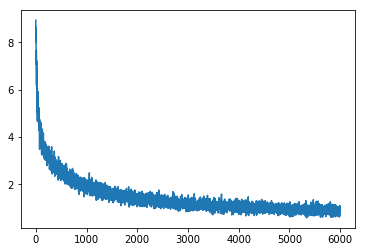

In [7]:
plt.plot(loss_history)

In [1]:
# conda install tensorflow